In [1]:
import numpy as np
import pandas as pd 
import nltk 
import string 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
reviews = pd.read_csv('/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/coursework_part_2/Part_2/dataset/amazon_cells_labelled.txt', sep="\t" , names = ['Review', 'Sentiment'])
reviews.sample(10)

,Review,Sentiment
385,The worst piece of crap ever along with the Ve...,0
29,Doesn't hold charge.,0
376,Protects the phone on all sides.,1
35,You need at least 3 mins to get to your phone ...,0
67,It feels more comfortable than most headsets b...,1
81,Not a good bargain.,0
336,Obviously there is a problem with the adhesive.,0
373,The worst phone I've ever had.... Only had it ...,0
516,I am very impressed with the job that Motorola...,1
970,I plugged it in only to find out not a darn th...,0


In [3]:
reviews.shape

(1000, 2)

In [4]:
reviews.dtypes

Review       object
Sentiment     int64
dtype: object

In [5]:
reviews['Sentiment'].value_counts()

0    500
1    500
Name: Sentiment, dtype: int64

## Text pre-processing steps

### 1. Changing sentence column datatype to string 

In [6]:
reviews = reviews.astype({'Review': 'string'})
reviews.dtypes

Review       string
Sentiment     int64
dtype: object

In [7]:
# only the sentence for text pre-processing 
review_column = reviews['Review']
review_column[:9]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
Name: Review, dtype: string

In [8]:
review_column[3]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

### 2. Removing punctuation, digits/numbers and turning all the text into lowercase

In [9]:
review_column1 = []

for row in review_column: 
    
    
    #remove punctuation 
    row = row.translate(str.maketrans('', '', string.punctuation))
    
    #remove digits/numbers 
    row = row.translate(str.maketrans('', '', string.digits))
    
    #change to lowercase 
    row = row.lower()
    
    review_column1.append(row)


In [10]:
review_column1[:5]

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than  minutesmajor problems',
 'the mic is great']

In [11]:
review_column1[0]

'so there is no way for me to plug it in here in the us unless i go by a converter'

In [12]:
review_column1 = pd.Series(review_column1)
review_column1[:5]

0    so there is no way for me to plug it in here i...
1                            good case excellent value
2                                great for the jawbone
3    tied to charger for conversations lasting more...
4                                     the mic is great
dtype: object

### 3. Removing words less than 3 characters long

In [13]:
# removing character less than 3
removing_lt_3 = review_column1.apply(lambda x: ' '.join(term for term in x.split() if len(term) > 2))
removing_lt_3

0           there way for plug here the unless converter
1                              good case excellent value
2                                  great for the jawbone
3      tied charger for conversations lasting more th...
4                                          the mic great
                             ...                        
995    the screen does get smudged easily because tou...
996           what piece junk lose more calls this phone
997                          item does not match picture
998    the only thing that disappoint the infra red p...
999    you can not answer calls with the unit never w...
Length: 1000, dtype: object

In [16]:
review_column1[0]

'so there is no way for me to plug it in here in the us unless i go by a converter'

In [17]:
removing_lt_3[0]

'there way for plug here the unless converter'

### 4. Remove stopwords

In [18]:
# setting english stopwords
stop_words = set(stopwords.words('English'))

review_column1 = removing_lt_3.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
review_column1[:10]

0                            way plug unless converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contacts imagine...
7                                   razr owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [19]:
review_column1[3]

'tied charger conversations lasting minutesmajor problems'

### 5. Applying Lemmatizing 

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
reviews_with_only_lemmatizing = review_column1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w) for w in x.split()))

In [21]:
reviews_with_only_lemmatizing[:10]

0                            way plug unless converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversation lasting minutesmajor...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                   razr owneryou must
8                              needle say wasted money
9                                     waste money time
dtype: object

### 6. Applying Lemmatizing with POS tags

In [22]:
# apply lemmatizing with POS tags 
from nltk.corpus import wordnet 

def get_wordnet_pos(word):
    # Map POS tag to first character Lemmatize() accepts 
    tag = nltk.pos_tag([word])[0][1][0].upper()
#     print(tag)
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN, 
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


# init WordNetLemmatizer
lemmatizer = WordNetLemmatizer()                     
reviews_with_POS_lemmatizing = review_column1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
reviews_with_POS_lemmatizing[:10]


0                            way plug unless converter
1                            good case excellent value
2                                        great jawbone
3    tie charger conversation last minutesmajor pro...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                   razr owneryou must
8                               needle say waste money
9                                     waste money time
dtype: object

In [23]:
#putting back preprocessed text and labels 

temp = list(zip(reviews_with_POS_lemmatizing, reviews.Sentiment))
reviews2 = pd.DataFrame(temp, columns = ['Review', 'Sentiment'])
reviews2

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


### 7. Transform the text into the bag of words representation with count (tf) values

In [24]:
cv = CountVectorizer(analyzer='word', ngram_range=(1, 1))
cv_reviews = cv.fit_transform(reviews2['Review'])

cv.get_feature_names_out()

array(['abhor', 'ability', 'able', ..., 'youd', 'youll', 'zero'],
      dtype=object)

In [25]:
print(cv_reviews.toarray()[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
cv_df = pd.DataFrame(data=cv_reviews.toarray(), columns = cv.get_feature_names_out())
cv_df

,abhor,ability,able,abound,abovepretty,absolutel,absolutely,accept,acceptable,access,...,wrong,wrongfirst,year,yearsgreat,yell,yes,yet,youd,youll,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
cv_df.sum().sort_values(ascending=False)[:10]

phone      174
work       112
great       98
good        77
use         69
well        57
product     56
headset     55
quality     49
battery     47
dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(use_idf = True)
tfidf_trans = transformer.fit(cv_reviews)
tfidf_trans_df = pd.DataFrame(data= tfidf_trans.idf_, index=cv.get_feature_names_out(), columns=["Idf_weights"])
display(tfidf_trans_df)

,Idf_weights
abhor,7.215608
ability,6.810142
able,6.299317
abound,7.215608
abovepretty,7.215608
...,...
yes,7.215608
yet,6.522460
youd,7.215608
youll,7.215608


In [134]:
#sort ascending 
tfidf_trans_df.sort_values(by=['Idf_weights'])[:10]

,Idf_weights
phone,2.796767
work,3.217407
great,3.334044
good,3.591267
use,3.689247
product,3.865704
well,3.865704
headset,3.919771
quality,3.996732
battery,4.058607


In [135]:
#tf-idf values
count_vector=cv.transform(reviews2['Review']) 
# tf-idf scores 
tf_idf_vector=transformer.transform(count_vector)
tf_idf_vector.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### 8. Transform the text into the bag of words representation with tf-idf values

In [31]:
tv = TfidfVectorizer(use_idf = True)

tv_reviews = tv.fit_transform(reviews2['Review'])

# print(tv_reviews)

In [32]:
# tv.vocabulary_

In [33]:
tv_df = pd.DataFrame(data= tv_reviews.toarray(), columns=tv.get_feature_names_out())
tv_df[tv_df['work'] == 1]

,abhor,ability,able,abound,abovepretty,absolutel,absolutely,accept,acceptable,access,...,wrong,wrongfirst,year,yearsgreat,yell,yes,yet,youd,youll,zero
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# #selecting all documents 
# tf_idf = pd.DataFrame(tv_reviews.todense())
# print(tf_idf)

In [35]:

# tf_idf.columns = tv.get_feature_names_out()
# tfidf_matrix = tf_idf.T
# tfidf_matrix.columns = ['document'+ str(i) for i in range(0,1000)]
# tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)


# print(tfidf_matrix)


In [36]:

# #top 10 words 
# tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10] 
# tfidf_matrix



In [37]:
# # Print the first 10 words 
# print(tfidf_matrix.drop(columns=['count']).head(10))

### 9. Get to top n features by tf-idf value and obtain descriptive statistics for them

In [38]:
features = np.array(tv.get_feature_names_out())

In [101]:
def get_top_tfidf_words(tv_reviews, top_n=10):
    importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[:: -1]
    return features[importance[:top_n]]

In [100]:
top_10 = get_top_tfidf_words(tv_reviews, 10)
list(top_10)

array([ 921,  558, 1445, ...,  402,  868,  538])

['phone',
 'great',
 'work',
 'good',
 'product',
 'well',
 'use',
 'headset',
 'quality',
 'battery']

In [129]:
ex = pd.DataFrame(data = tv_reviews.sum(axis=0), columns=features)
ex = ex.T

ex
ex = ex.sort_values(by=0,ascending=False)[:10]
ex

,0
phone,41.337912
great,38.916905
work,37.688145
good,26.757824
product,21.809860
well,18.426816
use,18.364065
headset,17.198897
quality,16.584041
battery,16.452838


In [103]:
np.asarray(tv_reviews.sum(axis=0)).ravel()

array([0.5553978 , 0.78640953, 1.78253367, ..., 0.7272638 , 0.65644581,
       0.44465463])

In [108]:
np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[:: -1]

array([ 921,  558, 1445, ...,  402,  868,  538])

In [106]:
features[np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[:: -1]][:10]

array(['phone', 'great', 'work', 'good', 'product', 'well', 'use',
       'headset', 'quality', 'battery'], dtype=object)

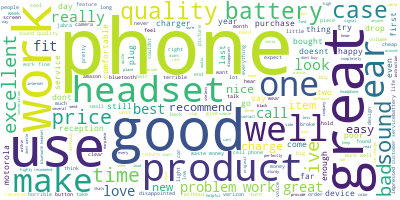

In [41]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews2['Review']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1356, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [42]:
statistics = {}
for ans in top_10: 
    statistics[ans] = tv_df[ans].describe()
    
    

In [77]:
stats = pd.DataFrame(statistics)
stats = stats.T
stats.drop(columns=['count'], inplace=True)
stats

,mean,std,min,25%,50%,75%,max
phone,0.041338,0.106203,0.0,0.0,0.0,0.0,0.642676
great,0.038917,0.133015,0.0,0.0,0.0,0.0,0.766138
work,0.037688,0.126376,0.0,0.0,0.0,0.0,1.000000
good,0.026758,0.102784,0.0,0.0,0.0,0.0,0.788973
product,0.021810,0.096465,0.0,0.0,0.0,0.0,0.757261
well,0.018427,0.082882,0.0,0.0,0.0,0.0,0.768614
use,0.018364,0.072968,0.0,0.0,0.0,0.0,0.607982
headset,0.017199,0.077184,0.0,0.0,0.0,0.0,0.638022
quality,0.016584,0.079576,0.0,0.0,0.0,0.0,0.743830
battery,0.016453,0.079851,0.0,0.0,0.0,0.0,0.658915


In [78]:
from scipy.stats import skew, kurtosis

In [79]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of TF-IDF values of the Top-10 frequently occuring terms')

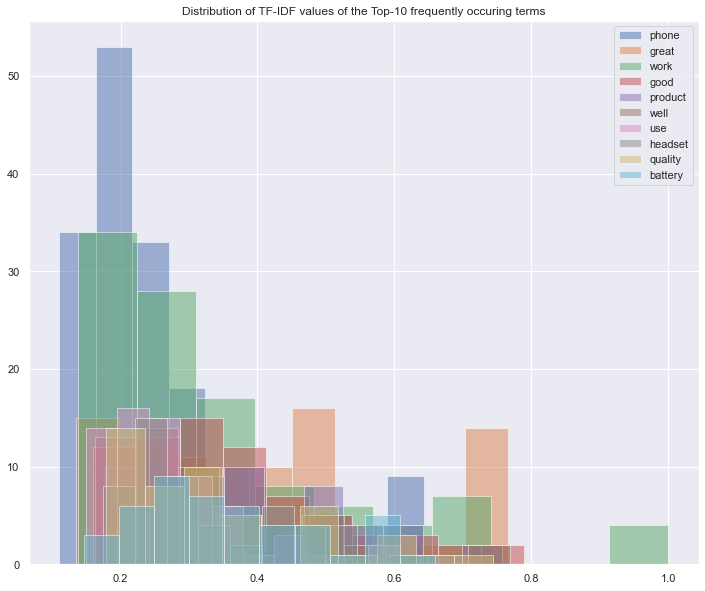

In [80]:
skewness = {}
plt.subplots((1), figsize=(12,10))
for term in top_10:
    temp = tv_df[term]
    temp = temp[temp > 0]
    skewness[term] = skew(tv_df[term], axis=0, bias=True)
    temp.hist(alpha=0.5)
plt.legend(top_10)
plt.title('Distribution of TF-IDF values of the Top-10 frequently occuring terms')
    

In [133]:
stats['Skewness'] = skewness.values()
stats['total(TF-IDF)'] = ex
stats

,mean,std,min,25%,50%,75%,max,Skewness,TF-IDF,total(TF-IDF)
phone,0.041338,0.106203,0.0,0.0,0.0,0.0,0.642676,3.089996,41.337912,41.337912
great,0.038917,0.133015,0.0,0.0,0.0,0.0,0.766138,3.729103,38.916905,38.916905
work,0.037688,0.126376,0.0,0.0,0.0,0.0,1.000000,4.206957,37.688145,37.688145
good,0.026758,0.102784,0.0,0.0,0.0,0.0,0.788973,4.220666,26.757824,26.757824
product,0.021810,0.096465,0.0,0.0,0.0,0.0,0.757261,4.785191,21.809860,21.809860
well,0.018427,0.082882,0.0,0.0,0.0,0.0,0.768614,5.172806,18.426816,18.426816
use,0.018364,0.072968,0.0,0.0,0.0,0.0,0.607982,4.344656,18.364065,18.364065
headset,0.017199,0.077184,0.0,0.0,0.0,0.0,0.638022,4.810984,17.198897,17.198897
quality,0.016584,0.079576,0.0,0.0,0.0,0.0,0.743830,5.409559,16.584041,16.584041
battery,0.016453,0.079851,0.0,0.0,0.0,0.0,0.658915,5.215231,16.452838,16.452838


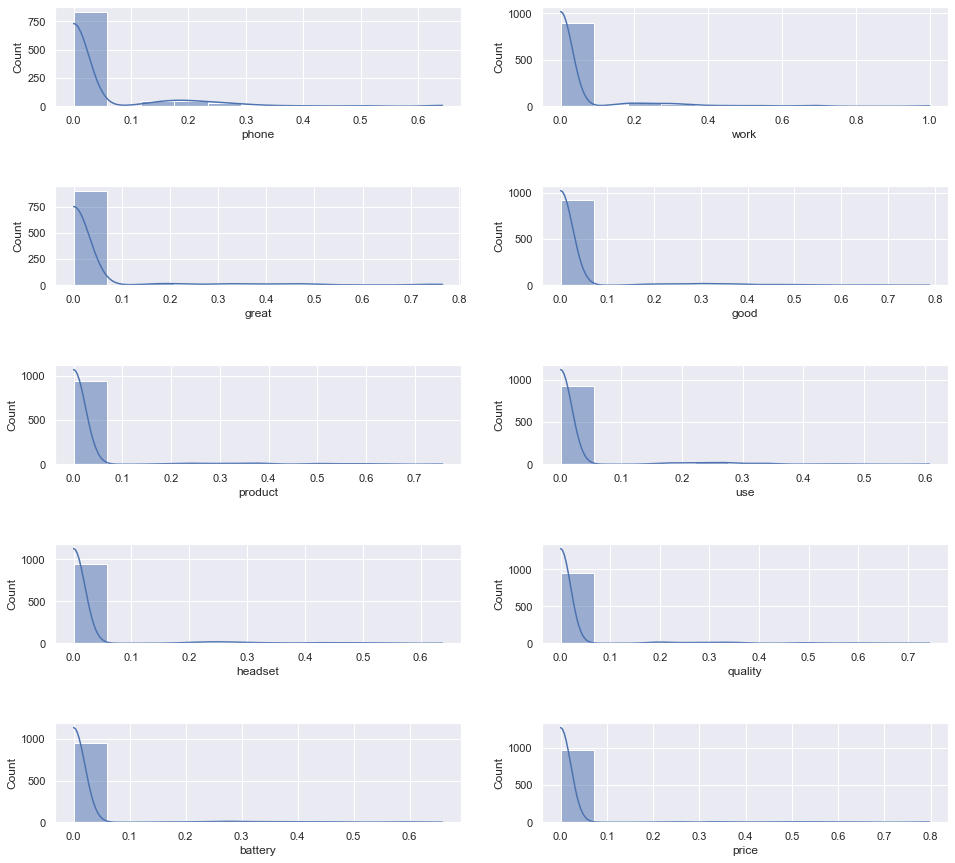

In [84]:
import seaborn as sns

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(5,2, figsize=(16,15))
plt.subplots_adjust(hspace = 0.8)

sns.histplot(data=tv_df, x='phone', ax=axes[0,0], kde=True)
sns.histplot(data=tv_df, x='work', ax=axes[0,1], kde=True)
sns.histplot(data=tv_df, x='great', ax=axes[1,0], kde=True)
sns.histplot(data=tv_df, x='good', ax=axes[1,1], kde=True)
sns.histplot(data=tv_df, x='product', ax=axes[2,0], kde=True)
sns.histplot(data=tv_df, x='use', ax=axes[2,1], kde=True)
sns.histplot(data=tv_df, x='headset', ax=axes[3,0], kde=True)
sns.histplot(data=tv_df, x='quality', ax=axes[3,1], kde=True)
sns.histplot(data=tv_df, x='battery', ax=axes[4,0], kde=True)
sns.histplot(data=tv_df, x='price', ax=axes[4,1], kde=True)
plt.show()

In [85]:
# cv_df['phone'].hist()

<AxesSubplot:>

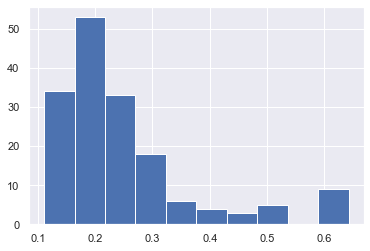

In [86]:



ans = tv_df['phone']

ans = ans[ans > 0]
ans.hist()


<AxesSubplot:>

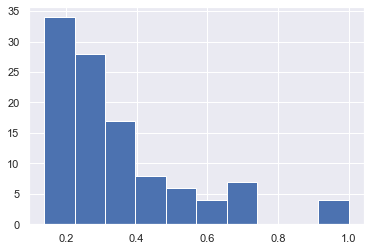

In [87]:

ans2 = tv_df['work']

ans2 = ans2[ans2 > 0]
ans2.hist()


<AxesSubplot:>

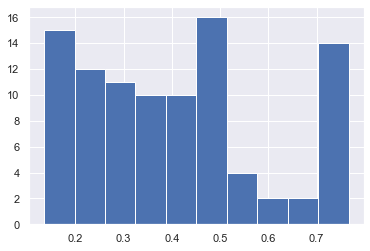

In [88]:

ans3 = tv_df['great']

ans3 = ans3[ans3 > 0]
ans3.hist()


<AxesSubplot:>

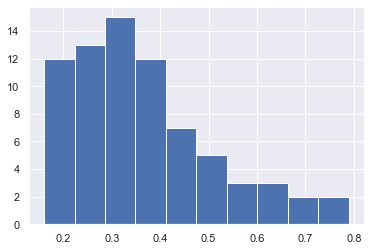

In [89]:

ans4 = tv_df['good']

ans4= ans4[ans4 > 0]
ans4.hist()

<AxesSubplot:>

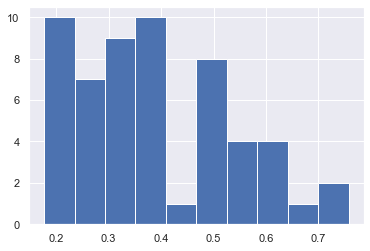

In [90]:

ans5 = tv_df['product']

ans5 = ans5[ans5 > 0]
ans5.hist()

<AxesSubplot:>

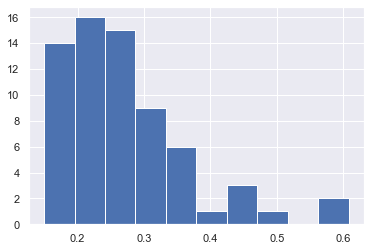

In [91]:

ans6 = tv_df['use']

ans6 = ans6[ans6 > 0]
ans6.hist()

<AxesSubplot:>

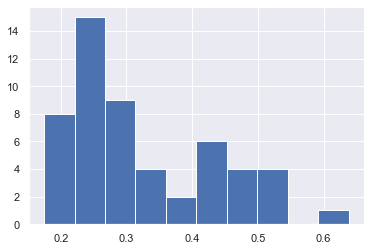

In [92]:

ans7 = tv_df['headset']

ans7 = ans7[ans7 > 0]
ans7.hist()

<AxesSubplot:>

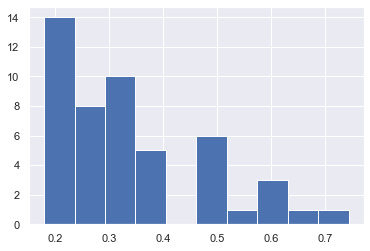

In [93]:

ans8 = tv_df['quality']

ans8 = ans8[ans8 > 0]
ans8.hist()

<AxesSubplot:>

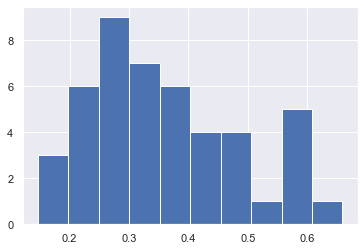

In [94]:

ans9 = tv_df['battery']

ans9 = ans9[ans9 > 0]
ans9.hist()

<AxesSubplot:>

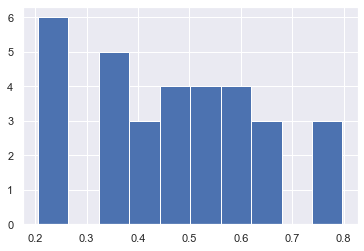

In [95]:

ans10 = tv_df['price']

ans10= ans10[ans10 > 0]
ans10.hist()

In [96]:

hist_details =[ans, ans2, ans3, ans4, ans5, ans6, ans7, ans8, ans9, ans10]



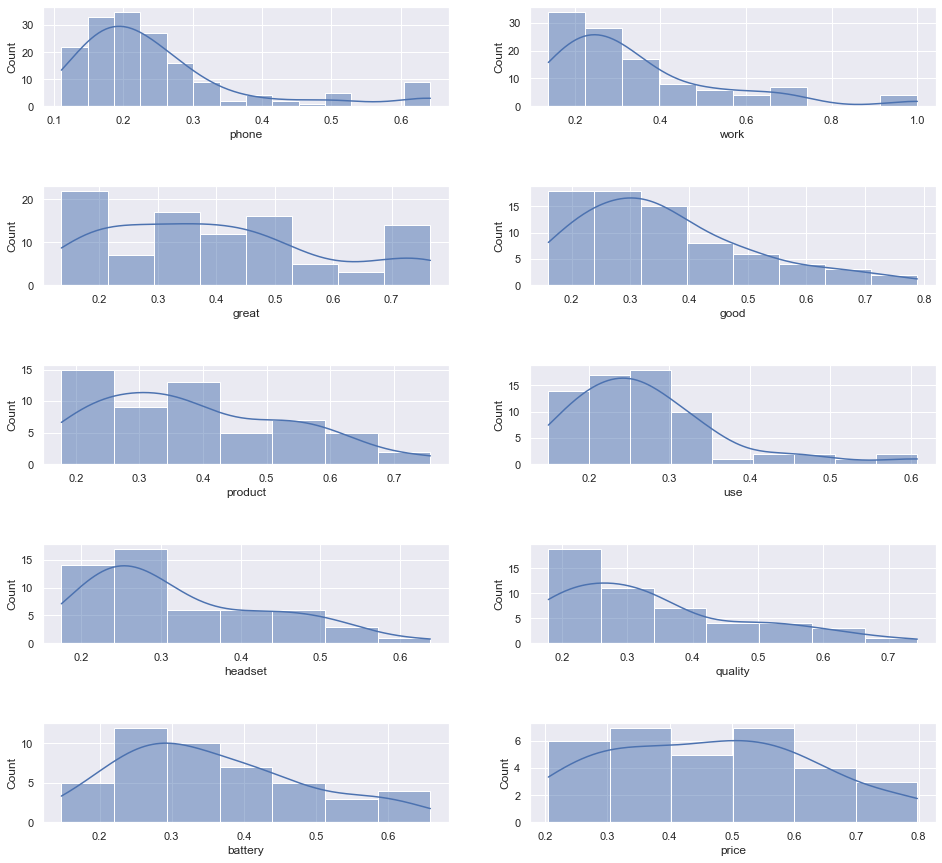

In [97]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(5,2, figsize=(16,15))
plt.subplots_adjust(hspace = 0.8)

sns.histplot(ans, ax=axes[0,0], kde=True)
sns.histplot(ans2,ax=axes[0,1], kde=True)
sns.histplot(ans3, ax=axes[1,0], kde=True)
sns.histplot(ans4, ax=axes[1,1], kde=True)
sns.histplot(ans5, ax=axes[2,0], kde=True)
sns.histplot(ans6, ax=axes[2,1], kde=True)
sns.histplot(ans7, ax=axes[3,0], kde=True)
sns.histplot(ans8, ax=axes[3,1], kde=True)
sns.histplot(ans9, ax=axes[4,0], kde=True)
sns.histplot(ans10, ax=axes[4,1], kde=True)
plt.show()

In [98]:
count = {}
for word in top_10:
    count[word] = cv_df[word].sum()
count

{'phone': 174,
 'great': 98,
 'work': 112,
 'good': 77,
 'product': 56,
 'well': 57,
 'use': 69,
 'headset': 55,
 'quality': 49,
 'battery': 47}